In [ ]:

import numpy as np
import pandas as pd
import string
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
blogs=pd.read_csv("/content/drive/MyDrive/blogs.csv",encoding = "ISO-8859-1")

In [ ]:
blogs

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [ ]:
blogs["Labels"].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [ ]:
blogs.isnull().sum()

,0
Data,0
Labels,0


In [ ]:
blogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
import re #regular expression
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [ ]:
blogs['Data'] = blogs.Data.apply(clean)
blogs.Data

,Data
0,path \nfrom frank odwyer\nnewsgroups altathei...
1,newsgroups altatheism\npath \nfrom bilokcforum...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4,xref cantaloupesrvcscmuedu \nnewsgroups alta...
...,...
1995,xref cantaloupesrvcscmuedu \npath \nfrom fr...
1996,xref cantaloupesrvcscmuedu \nnewsgroups talk...
1997,xref cantaloupesrvcscmuedu \npath cantaloupes...
1998,xref cantaloupesrvcscmuedu \npath cantaloupes...


In [ ]:
#Word frequency
freq = pd.Series(' '.join(blogs['Data']).split()).value_counts()[:20] # for top 20
freq

,count
the,26780
to,13429
of,12697
a,11214
and,10863
in,9068
i,8155
is,7970
that,7092
it,5509


In [ ]:
#removing stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
blogs['Data'] = blogs['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
blogs.shape

(2000, 2)

In [ ]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(blogs['Data']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
subject,2170
lines,2086
date,2083
path,2046
newsgroups,2038
messageid,2006
organization,1979
apr,1940
gmt,1785
one,1588


In [ ]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(blogs["Data"])
# Use get_feature_names_out() instead of get_feature_names()
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [ ]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,9,0.000029
1,aaa,3,0.000010
2,aaaaarrrrgh,1,0.000003
3,aaboston,1,0.000003
4,aalternate,1,0.000003
5,aaltonen,3,0.000010
6,aam,1,0.000003
7,aan,6,0.000019
8,aangegeven,1,0.000003
9,aantal,1,0.000003


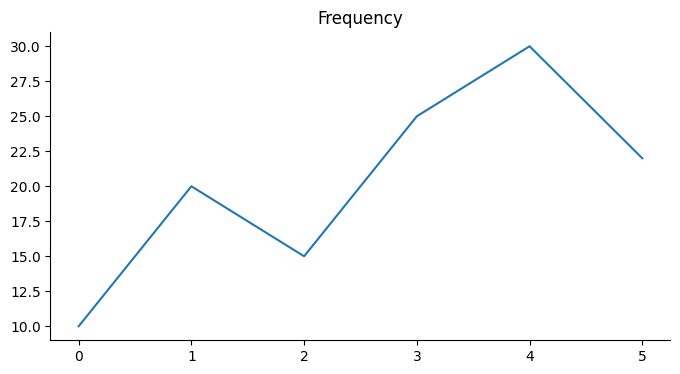

In [ ]:
# Assuming _df_4 is the DataFrame and it contains a column named 'frequency'
import pandas as pd
from matplotlib import pyplot as plt

# Example DataFrame creation (you can replace this with your actual DataFrame)
_df_4 = pd.DataFrame({
    'frequency': [10, 20, 15, 25, 30, 22]
})

# Plotting the 'frequency' column
_df_4['frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)  # This will hide the top and right spines (borders)
plt.show()


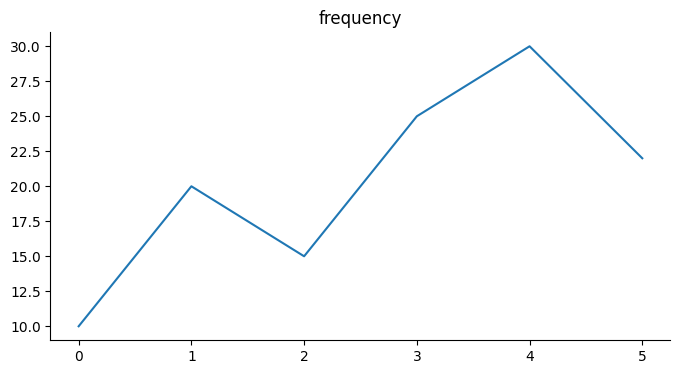

In [ ]:
from matplotlib import pyplot as plt
_df_4['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

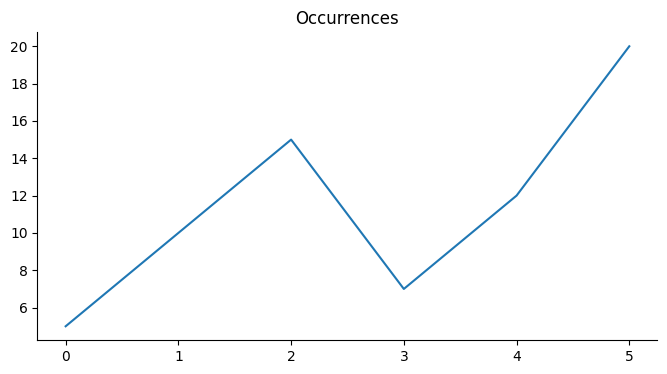

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)
_df_3 = pd.DataFrame({
    'occurrences': [5, 10, 15, 7, 12, 20]
})

# Plotting the 'occurrences' column
_df_3['occurrences'].plot(kind='line', figsize=(8, 4), title='Occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines (borders)
plt.show()


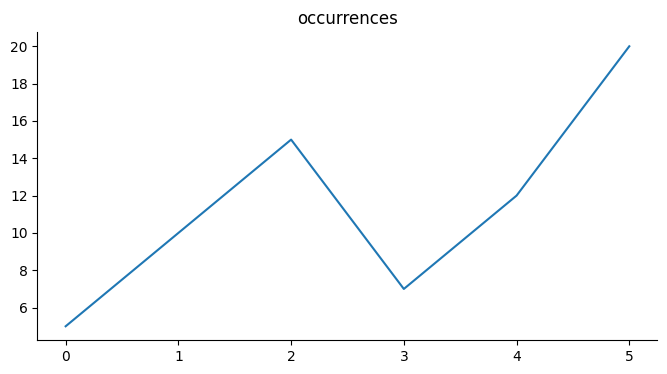

In [ ]:
from matplotlib import pyplot as plt
_df_3['occurrences'].plot(kind='line', figsize=(8, 4), title='occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(blogs["Data"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [ ]:
df

,able,accept,access,according,account,act,action,actions,actually,add,...,xref,yeah,year,years,yes,york,youll,young,youre,youve
0,0.0,0.053795,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045314,0.0,0.0,0.0,0.000000,0.057375
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.111891,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.108118,0.000000,0.000000,...,0.000000,0.333197,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.082636,0.000000
3,0.0,0.024288,0.0,0.0,0.023592,0.025378,0.127914,0.103619,0.038420,0.000000,...,0.000000,0.000000,0.018922,0.017126,0.122754,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.227837,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.038814,0.000000,0.000000,0.053550,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.0,0.0,0.000000,0.042821,0.000000,0.000000,0.032413,0.000000,...,0.020945,0.000000,0.000000,0.028897,0.069042,0.0,0.0,0.0,0.033408,0.087420
1996,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071218,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1997,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096870,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1998,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.179264,0.113326,...,0.057918,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


**N-gram**

In [ ]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(blogs["Data"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,apr gmt,1624
1,date apr,839
2,gmt lines,728
3,messageid date,617
4,xref cantaloupesrvcscmuedu,574


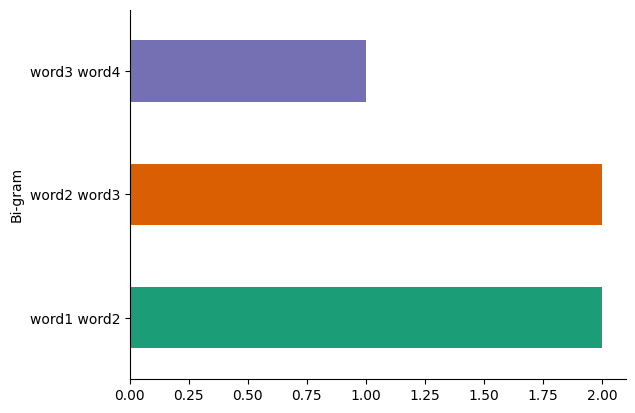

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Example DataFrame (replace this with your actual DataFrame)
_df_6 = pd.DataFrame({
    'Bi-gram': ['word1 word2', 'word2 word3', 'word1 word2', 'word3 word4', 'word2 word3']
})

# Grouping by 'Bi-gram' and plotting
_df_6.groupby('Bi-gram').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.show()


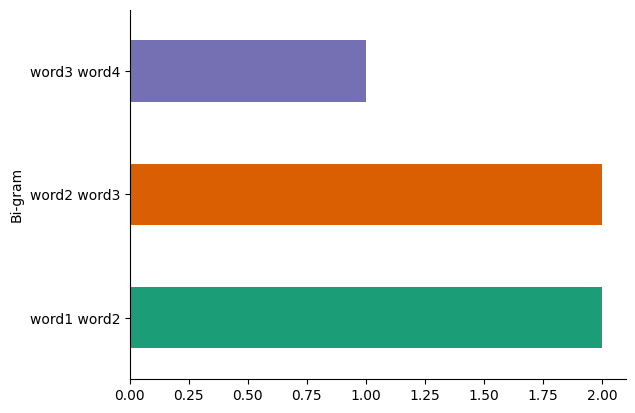

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Bi-gram').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-28-8ad2e7024b98>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'apr gmt'),
 Text(1, 0, 'date apr'),
 Text(2, 0, 'gmt lines'),
 Text(3, 0, 'messageid date'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu'),
 Text(5, 0, 'lines article'),
 Text(6, 0, 'references date'),
 Text(7, 0, 'messageid sender'),
 Text(8, 0, 'organization university'),
 Text(9, 0, 'writes article'),
 Text(10, 0, 'cantaloupesrvcscmuedu newsgroups'),
 Text(11, 0, 'cantaloupesrvcscmuedu path'),
 Text(12, 0, 'gmt organization'),
 Text(13, 0, 'messageid references'),
 Text(14, 0, 'gmt references'),
 Text(15, 0, 'references nntppostinghost'),
 Text(16, 0, 'fri apr'),
 Text(17, 0, 'tue apr'),
 Text(18, 0, 'date thu'),
 Text(19, 0, 'date tue')]

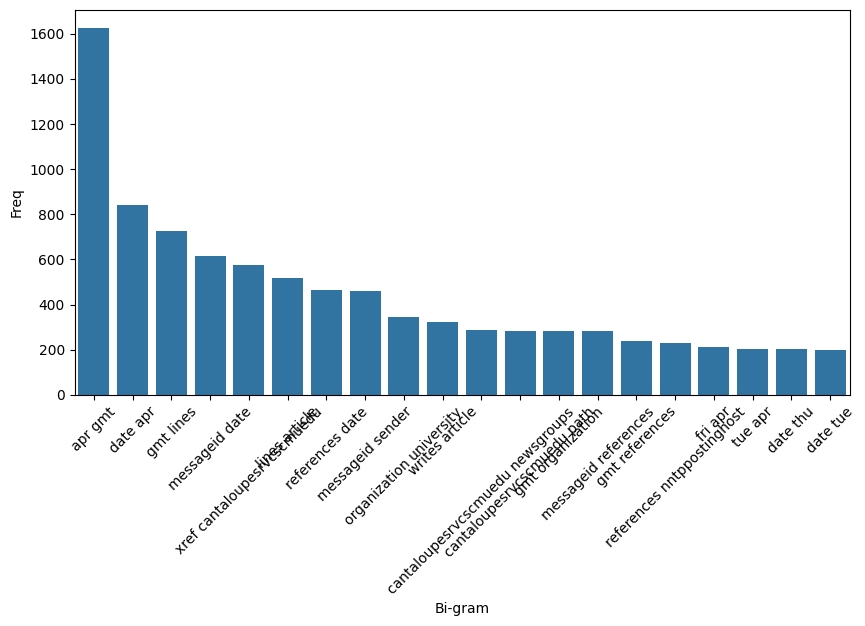

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


In [ ]:
top3_words = get_top_n3_words(blogs["Data"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,date apr gmt,676
1,apr gmt lines,670
2,messageid date apr,452
3,gmt lines article,291
4,xref cantaloupesrvcscmuedu newsgroups,289
...,...,...
195,system organization university,15
196,computer science department,15
197,christian morality messageid,15
198,lines nntppostinghost article,15


<ipython-input-32-785b9243dc80>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'date apr gmt'),
 Text(1, 0, 'apr gmt lines'),
 Text(2, 0, 'messageid date apr'),
 Text(3, 0, 'gmt lines article'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu newsgroups'),
 Text(5, 0, 'xref cantaloupesrvcscmuedu path'),
 Text(6, 0, 'apr gmt organization'),
 Text(7, 0, 'apr gmt references'),
 Text(8, 0, 'messageid references nntppostinghost'),
 Text(9, 0, 'date fri apr'),
 Text(10, 0, 'fri apr gmt'),
 Text(11, 0, 'date tue apr'),
 Text(12, 0, 'date thu apr'),
 Text(13, 0, 'tue apr gmt'),
 Text(14, 0, 'thu apr gmt'),
 Text(15, 0, 'date wed apr'),
 Text(16, 0, 'wed apr gmt'),
 Text(17, 0, 'date mon apr'),
 Text(18, 0, 'mon apr gmt'),
 Text(19, 0, 'lines messageid references')]

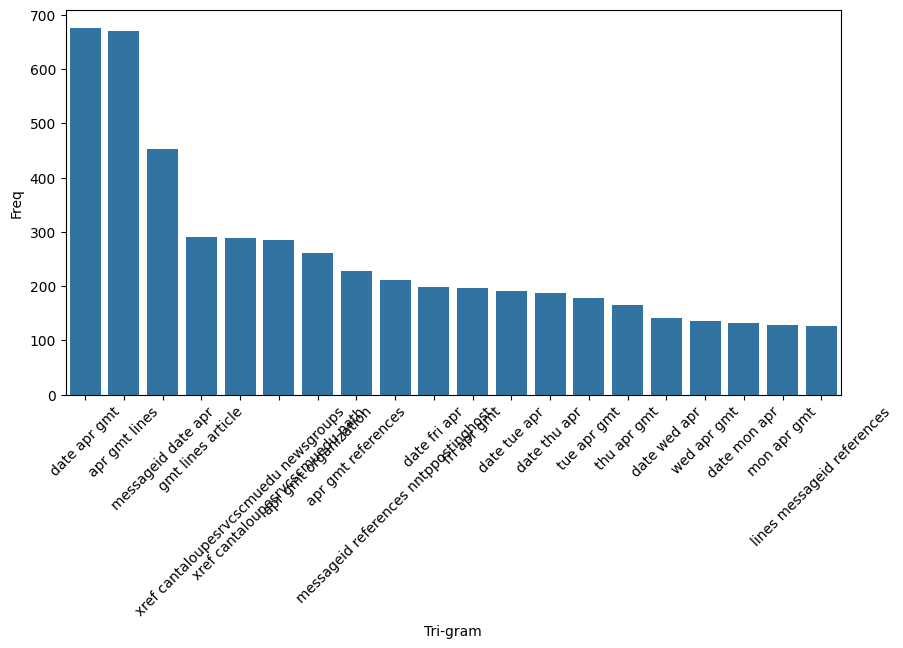

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

**WordCloud**

In [ ]:
string_Total = " ".join(blogs["Data"])

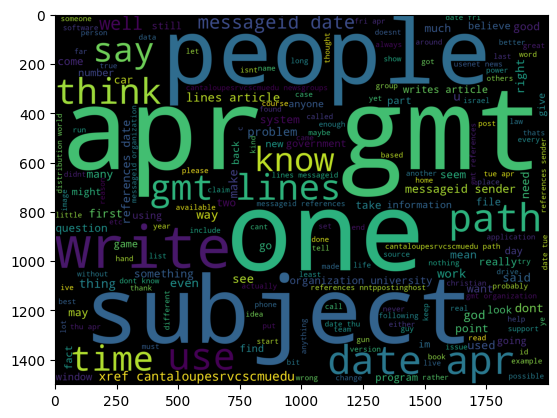

In [ ]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 2000,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [ ]:
blogs

,Data,Labels
0,path frank odwyer newsgroups altatheism subjec...,alt.atheism
1,newsgroups altatheism path bilokcforumosrheedu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path jbrownbatmanbmdtrwcom newsgroups altathei...,alt.atheism
4,xref cantaloupesrvcscmuedu newsgroups altathei...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu path frank odwyer n...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu newsgroups talkreli...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu path cantaloupesrvc...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu path cantaloupesrvc...,talk.religion.misc


In [ ]:
def split_into_words(i):
    return (i.split(" "))

In [ ]:
from sklearn.model_selection import train_test_split

blogs_train,blogs_test = train_test_split(blogs,test_size=0.3)

In [ ]:
blogs_train

,Data,Labels
860,newsgroups recmotorcycles path cantaloupesrvcs...,rec.motorcycles
1256,peterminsaneapanaorgau peter tryndoch sender f...,sci.electronics
323,path phantomdikudk haktan bulut newsgroups com...,comp.sys.ibm.pc.hardware
1251,newsgroups scielectronics path domaincbnewsfcb...,sci.electronics
469,path cantaloupesrvcscmuedudasnewsharvardedunoc...,comp.sys.mac.hardware
...,...,...
1407,xref cantaloupesrvcscmuedu newsgroups sciastro...,sci.space
1486,xref cantaloupesrvcscmuedu path cantaloupesrvc...,sci.space
1778,path cantaloupesrvcscmuedumagnesiumclubcccmued...,talk.politics.mideast
781,newsgroups recautos path cantaloupesrvcscmuedu...,rec.autos


In [ ]:
# Preparing email texts into word count matrix format
blogs_bow = CountVectorizer(analyzer=split_into_words).fit(blogs.Data)

In [ ]:
# For all messages
all_blogs_matrix = blogs_bow.transform(blogs.Data)
all_blogs_matrix.shape

(2000, 39214)

In [ ]:
# For training messages
train_blogs_matrix = blogs_bow.transform(blogs_train.Data)
print(train_blogs_matrix.shape)

# For testing messages
test_blogs_matrix = blogs_bow.transform(blogs_test.Data)
print(test_blogs_matrix.shape)

(1400, 39214)
(600, 39214)


**Naive Bayes Model**

In [ ]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_blogs_matrix,blogs_train.Labels)
train_pred_m = classifier_mb.predict(train_blogs_matrix)
accuracy_train_m = np.mean(train_pred_m==blogs_train.Labels)
print(accuracy_train_m)

test_pred_m = classifier_mb.predict(test_blogs_matrix)
accuracy_test_m = np.mean(test_pred_m==blogs_test.Labels)
print(accuracy_test_m)


0.9971428571428571
0.7433333333333333


In [ ]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_blogs_matrix.toarray(),blogs_train.Labels.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_blogs_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==blogs_train.Labels)
print(accuracy_train_g )
test_pred_g = classifier_gb.predict(test_blogs_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==blogs_test.Labels)
print(accuracy_test_g)

1.0
0.6683333333333333


**Using TFIDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_blogs_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_blogs_matrix)
print(train_tfidf.shape)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_blogs_matrix)
print(test_tfidf.shape)

(1400, 39214)
(600, 39214)


In [ ]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,blogs_train.Labels)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==blogs_train.Labels)
print(accuracy_train_m)
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==blogs_test.Labels)
print(accuracy_test_m)

0.995
0.8316666666666667


In [ ]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),blogs_train.Labels.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==blogs_train.Labels)
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==blogs_test.Labels)

In [ ]:
print(accuracy_train_g)
print(accuracy_test_g)

1.0
0.6516666666666666


**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Accuracy:", accuracy_score(blogs_test.Labels, test_pred_m))
print("Classification Report:\n", classification_report(blogs_test.Labels, test_pred_m))

Accuracy: 0.8316666666666667
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.75      0.75      0.75        32
           comp.graphics       0.67      0.89      0.76        27
 comp.os.ms-windows.misc       0.62      0.88      0.73        26
comp.sys.ibm.pc.hardware       0.79      0.87      0.83        30
   comp.sys.mac.hardware       0.89      0.83      0.86        29
          comp.windows.x       1.00      0.66      0.79        32
            misc.forsale       0.90      0.87      0.88        30
               rec.autos       0.96      0.87      0.91        30
         rec.motorcycles       0.90      1.00      0.95        26
      rec.sport.baseball       0.97      0.97      0.97        29
        rec.sport.hockey       0.97      1.00      0.98        32
               sci.crypt       0.97      0.92      0.94        37
         sci.electronics       0.90      0.53      0.67        34
                 sci.m

**Sentiment Analysis**

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

blogs['Sentiment'] = blogs['Data'].apply(get_sentiment)


In [ ]:
sentiment_dist = blogs.groupby('Labels')['Sentiment'].value_counts(normalize=True)
print(sentiment_dist)

Labels                    Sentiment
alt.atheism               Positive     0.65
                          Negative     0.35
comp.graphics             Positive     0.73
                          Negative     0.27
comp.os.ms-windows.misc   Positive     0.76
                          Negative     0.24
comp.sys.ibm.pc.hardware  Positive     0.81
                          Negative     0.19
comp.sys.mac.hardware     Positive     0.74
                          Negative     0.26
comp.windows.x            Positive     0.77
                          Negative     0.21
                          Neutral      0.02
misc.forsale              Positive     0.79
                          Negative     0.21
rec.autos                 Positive     0.76
                          Negative     0.24
rec.motorcycles           Positive     0.71
                          Negative     0.29
rec.sport.baseball        Positive     0.65
                          Negative     0.35
rec.sport.hockey          Positive     0